## Laboratorio di Potenziamento 1 Giugno 2023

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify

from scipy.io import loadmat
import scipy.linalg as spl
import RisolviSis as utils

## Esercizio 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testE.mat``.  La soluzione esatta del problema è il vettore x=[1,1,1,...1].Risolvere il sistema utilizzando i diversi metodi adatti visti a lezione adatti per risolverlo ed individuare il metodo più efficiente. Commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testE.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

Numero di righe:  100  Numero di colonne:  100
Percentuale di elementi non nulli:  2.98 %
La matrice non è simmetrica
La matrice è definita positiva
La matrice è a diagonale dominante:  True
raggio spettrale jacobi 0.9997193113493894
raggio spettrale Gauss-Seidel  0.9994387014848923
raggio spettrale Gauss-Seidel SOR  0.9986899761478689
soluzione jacobi 36047
soluzione gauss 19259
soluzione gauss sor 14183


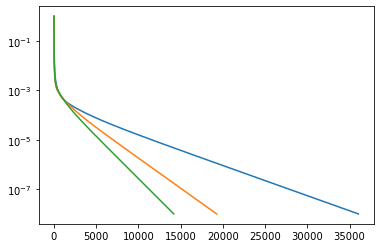

In [12]:
dati = loadmat('testE.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è simmetrica
if (A.transpose() == A).all():
    print("La matrice è simmetrica")
else :
    print("La matrice non è simmetrica")
# Controllo se la matrice è definita positiva
if np.all(np.linalg.eigvals(A) > 0):
    print("La matrice è definita positiva")
else :
    print("La matrice non è definita positiva")
# La matrice non è simmetrica e ma è definita positiva quindi controllo se è a diagonale dominante
def verifica_dd(A):
    n=A.shape[0]
    flag=True
    for i in range(n):
        el_diag=np.abs(A[i,i])
        sum_extradiag=np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        if el_diag< sum_extradiag:
            print("Matrice non a diagonale  dominante")
            flag=False
            return flag
    return flag
dd=verifica_dd(A)
print("La matrice è a diagonale dominante: ",dd)

def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=np.dot(invM,N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    #xold=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+np.dot(N,x0))/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-np.dot(F,x0)
        x,flag=utils.Lsolve(M,temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    Dinv=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(np.linalg.inv(Momega),Nomega)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-np.dot(F,xold)
        xtilde,flag=utils.Lsolve(M,temp)
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet
# ora risolvo il sistema con i tre metodi
x0=np.zeros(A.shape[0]).reshape(n,1) # vettore iniziale di zeri, il reshape serve per avere un vettore colonna
tol=1e-8
it_max=100000
omega=1.4 # parametro per il metodo SOR che deve essere compreso tra 0 e 2 e per cui si ha un numero di iterazioni minimo
sol_jacobi,it_jacobi,er_jacobi=jacobi(A,b,x0,tol,it_max)
sol_gauss,it_gauss,er_gauss=gauss_seidel(A,b,x0,tol,it_max)
sol_gauss_sor,it_gauss_sor,er_gauss_sor=gauss_seidel_sor(A,b,x0,tol,it_max,omega)
print("soluzione jacobi", it_jacobi)
print("soluzione gauss", it_gauss)
print("soluzione gauss sor", it_gauss_sor)
plt.semilogy(np.arange(it_jacobi),er_jacobi,np.arange(it_gauss),er_gauss,np.arange(it_gauss_sor),er_gauss_sor)

## Esercizio 2 
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testF.mat``.Risolvere il sistema utilizzando il metodo più adatto. Commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testF.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

In [17]:
dati = loadmat('testF.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e colonne della matrice
n,m=A.shape
if n==m:
    print("Matrice quadrata, dimensione", n ,"x", m)
else:
    print("Matrice non quadrata, dimensione", n ,"x", m)
# la matrice non è quadrata quindi verifico se la matrice è a rango massimo
U,s,VT=spl.svd(A)  #Attenzione : Restituisce U, Sigma e VT=VTrasposta)
thresh= np.spacing(1)*m*s[0] #m=max(m,n)
k=np.count_nonzero(s>thresh) #Calcolo del rango della matrice, numero dei valori singolari diversi maggiori della soglia
print("rango=",k)
if k<n:
    print("La matrice non ha rango massimo")
else:
    print("La matrice ha rango massimo")
# controllo se è mal condizionata
cond=np.linalg.cond(A)
print("numero di condizionamento", cond) # è mal condizionata

# dato che la matrice è mal condizionata, uso SVD per risolvere il sistema
def SVDLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    U,s,VT=spl.svd(A)  #Attenzione : Restituisce U, Sigma e VT=VTrasposta)
    V=VT.T
     
    thresh=np.spacing(1)*m*s[0] 
    ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("rango=",k)
    if k<n:
        print("La matrice non è a rango massimo")
    else:
        print("La matrice è a rango massimo")
    d=U.T@b
    d1=d[:k].reshape(k,1)
    s1=s[:k].reshape(k,1)
    #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c=d1/s1
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2
    return x,residuo

x,residuo=SVDLS(A,b)
print("Soluzione nel senso dei minimi quadrati\n  ", x)
print("residuo ",residuo)
print("Norma soluzione ", np.linalg.norm(x))

Matrice non quadrata, dimensione 50 x 19
rango= 15
La matrice non ha rango massimo
numero di condizionamento 7.369247483328769e+17
rango= 15
La matrice non è a rango massimo
Soluzione nel senso dei minimi quadrati
   [[ 8.93308674e-01]
 [ 5.99593662e-02]
 [-1.00818890e-04]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.08594726e+00]
 [ 1.16319260e+00]
 [ 9.47694272e-01]
 [ 9.09857191e-01]]
residuo  4.3087582643171665e-27
Norma soluzione  4.130358162106168


In [21]:
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=spl.qr(A)
    h=Q.T@b
    x,flag=utils.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [29]:
def eqnorm(A,b):
    G=A.T@A
    print("Indice di condizionamento di G ",np.linalg.cond(G))
    f=A.T@b
    L=spl.cholesky(G,lower=True)
    y,flag=utils.Lsolve(L,f)
    if flag==0:
        x,flag=utils.Usolve(L.T,y)
    return x

## Esercizio 3

Caricare dal  file  Approx_C.mat  le coppie di dati sperimentali (x(i),y(i)),i=1,M) e visto il trend dei dati, scegliere opportunamente  il grado del polinomio con cui approssimare  i dati. Costruirlo con un metodo di approssimazione nel senso dei minimi quadrati a scelta tra quello più opportuno allaluce della teoria, calcolare la norma 2 al quadrato del residuo e visualizzare  il grafico.



Matrice dimensione 25 x 1
rango matrice 4 condizionamento 138.0410649852687
residuo  28054.66293085902


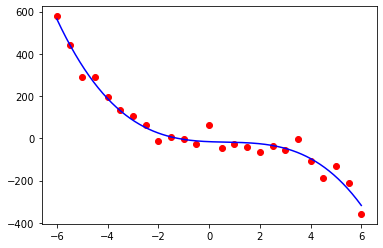

In [31]:
dati = loadmat('Approx_C.mat')
A=dati["x"]
b=dati["y"]
n,m=A.shape
print("Matrice dimensione", n ,"x", m)
A=A.reshape(n,)
b=b.reshape(n,)
plt.plot(A,b,'ro')
# analizzando il trend dei dati, si può ovvervare che ha un andamento di un polinomio di grado 3
n=3
n1=n+1
A3=np.vander(A,increasing=True)[:,:n1]
print("rango matrice", np.linalg.matrix_rank(A3), "condizionamento", np.linalg.cond(A3))
#La matrice A è a rango massimo e mediamente mal condizionata,
#la matrice A^T A, avraà indice di condizionamento il quadrato dell'indice di condizionamento
#di A, per cui uso il metodo QR
alpha,residuo=qrLS(A3,b)
print("residuo ",residuo)
xx=np.linspace(np.min(A),np.max(A),200)
polQR=np.polyval(np.flip(alpha),xx)
plt.plot(xx,polQR,'b')

## Esercizio 4
Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=4, \quad x_3=0, \quad x_4=5\\
y_1=0, \quad y_2=0, \quad y_3=4, \quad y_4=6.
\end{array}
$$ 


 si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;

si sfrutti il metodo  più opportuno per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$;

si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$ e, dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.

Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$

## Esercizio 5
Per i dati $(x_i, y_i)$ riportati nei seguenti array

x = np.array([0.0004, 0.2507, 0.5008, 2.0007, 8.0013]) 

y = np.array([0.0007,0.0162, 0.0288, 0.0309, 0.0310])

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;
- determinare l'approssimazione ai minimi quadrati espressa in termini di
basi esponenziali: $y = a + b e^{-x}+ c e^{-2x}$

Quale tra le tre approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).

La temperatura T in prossimita' del suolo varia al variare della concentrazione k dell'acido carbonico e della latitudine L. Per k=1.5 la temperatura al suolo subisce una variazione dipendente dalla temperatura secondo la seguente tabella 

L	[-55	-45	-35	-25	-15	-5	5	15	25	35	45	55	65]

T	[3.7	3.7	3.52	3.27	3.2	3.15	3.15	3.25	3.47	3.52	3.65	3.67	3.52]

Si vuole costruire un MODELLO che descriva la legge T=T(L) anche per latitudini non misurate. 
Ad esempio si vuole valutare la variazione di temperatura a Londra ( L=51°).
mediante interpolazione con un polinomio di grado 12.
Valutare e disegnare, inoltre, il polinomio interpolatore di Lagrange in un set di 100 dati equidistanti nell’intervallo min(L), max(L).
Descrivere i risultati alla luce della teoria.
